In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [90]:
webpage=requests.get('https://www.jobthai.com/%E0%B8%AB%E0%B8%B2%E0%B8%87%E0%B8%B2%E0%B8%99/%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%97%E0%B8%B1%E0%B9%89%E0%B8%87%E0%B8%AB%E0%B8%A1%E0%B8%94/1').text

In [2]:
# https://www.ambitionbox.com/list-of-companies?page=1
final=pd.DataFrame()
for j in range(1,10):
    webpage=requests.get('https://www.jobthai.com/%E0%B8%AB%E0%B8%B2%E0%B8%87%E0%B8%B2%E0%B8%99/%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%88%E0%B9%89%E0%B8%B2%E0%B8%AB%E0%B8%99%E0%B9%89%E0%B8%B2%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%9B%E0%B8%A5%E0%B8%AD%E0%B8%94%E0%B8%A0%E0%B8%B1%E0%B8%A2-%E0%B8%88%E0%B8%9B-%E0%B8%AA%E0%B8%B4%E0%B9%88%E0%B8%87%E0%B9%81%E0%B8%A7%E0%B8%94%E0%B8%A5%E0%B9%89%E0%B8%AD%E0%B8%A1-iso/{}'.format(j)).text
    soup=BeautifulSoup(webpage,'lxml')
    company=soup.find_all('div',class_='ant-row msklqa-8 hQCzHL')
    d1 = []
    d2 = []
    d3 = []
    d4 = []
    d5 = []
    d6 = []

    for i in company:

        try:
            d1.append(i.find_all('span', class_='ohgq7e-0 msklqa-6 itKEax')[1].text.strip())
        except:
            d1.append(np.nan)

        try:
            d2.append(i.find('h2', class_='ohgq7e-0 frNqfE').text.strip())
        except:
            d2.append(np.nan)
   
        try:
            d3.append(i.find('h2', class_='ohgq7e-0 gWWIiL').text.strip())
        except:
            d3.append(np.nan)

        try:
            d4.append(i.find('h3', class_='ohgq7e-0 ijtKqG').text.strip())
        except:
            d4.append(np.nan)

        try:
            d5.append(i.find('span', class_='ohgq7e-0 msklqa-5 gfpnRh').text.strip())
        except:
            d5.append(np.nan)
            
        try:
            d6.append(i.find_all('span', class_='ohgq7e-0 msklqa-5 gfpnRh')[1].text.strip())
        except:
            d6.append(np.nan)
    

    df=pd.DataFrame({'Date':d1,
            'jobName':d2,
            'company':d3,
            'colcation':d4,
            'salary':d5,
            'salary':d5,
            'disableperson' : d6    
            })
  
    final=final.append(df,ignore_index=True)

In [3]:
final

,Date,jobName,company,colcation,salary,disableperson
0,17 เม.ย. 65,HSE Auditor(ผู้ตรวจสอบสายงานความปลอดภัยและสิ่งแวดล้อม) - ประสบการณ์ 5 ปีขึ้นไป,"SGS (Thailand) Co., Ltd.",เขตยานนาวา กรุงเทพมหานคร,,NaN
1,17 เม.ย. 65,เจ้าหน้าที่ความปลอดภัย (Safety Officer) - ประสบการณ์ 1 ปีขึ้นไป,"SGS (Thailand) Co., Ltd.",เขตยานนาวา กรุงเทพมหานคร,"20,000 - 30,000",NaN
2,17 เม.ย. 65,จป.วิชาชีพ ( ประจำโรงงานสาขาบ้านบึง ชลบุรี ),บริษัท จรูญรัตน์ โปรดักส์ จำกัด,จ.ชลบุรี,,
3,17 เม.ย. 65,เจ้าหน้าที่ความปลอดภัย/สิ่งแวดล้อม,Blue River Products Ltd.,อ.บ้านโป่ง จ.ราชบุรี,ตามตกลง,
4,17 เม.ย. 65,เจ้าหน้าที่ความปลอดภัย ระดับเทคนิค ประจำไซด์งาน,บริษัท อิเรเดี๊ยน โซล่า จำกัด,อ.เมืองสมุทรสาคร จ.สมุทรสาคร,ตามตกลง,
...,...,...,...,...,...,...
172,15 เม.ย. 65,Safety and Environment Manager,"Makita Manufacturing (Thailand) Co., Ltd.",นิคมอุตสาหกรรมปิ่นทอง 3 จ.ชลบุรี,N/A,NaN
173,15 เม.ย. 65,เจ้าหน้าที่ควบคุมเอกสาร DCC,STANDARD CAN COMPANY LIMITED / บริษัท แสตนดาร์ดแคน จำกัด,อ.บางพลี จ.สมุทรปราการ,ตามโครงสร้างบริษัท,NaN
174,14 เม.ย. 65,จป.วิชาชีพ,"Bow Bakery House Co., Ltd.",เขตทุ่งครุ กรุงเทพมหานคร,"18,000-20,000",NaN
175,14 เม.ย. 65,Safety Officer (Professional Level) จป.วิชาชีพ (สัญญาจ้างประจำโครงการ),Deeline Construction Company Limited (บจก.ดีไลน์ คอนสตรัคชั่น),อ.เมืองระยอง จ.ระยอง,ตามโครงสร้างบริษัทฯ,NaN


In [4]:
final.salary.value_counts()

ตามตกลง                                                                      47
ตามโครงสร้างบริษัท                                                           18
N/A                                                                          13
ไม่ระบุ                                                                      13
ตามโครงสร้างบริษัทฯ                                                          11
ตามโครงสร้าง                                                                 11
                                                                              5
20,000-25,000                                                                 3
ตามประสบการณ์                                                                 3
ต่อรองได้, พิจารณาตามความสามารถ ประสบการณ์ และโครงสร้างเงินเดือนของบริษัท     2
ขึ้นอยู่กับประสบการณ์ทำงานและโครงสร้างองค์กร                                  2
ตามโครงสร้างองค์กร                                                            2
Negotiate                               

In [5]:
len(final) 

177

In [6]:
data = pd.read_json('data.json')
data

,id,locationCoordinates
0,710295,"{'lon': 101.1104316, 'lat': 13.0123506}"
1,475105,"{'lon': 101.1104316, 'lat': 13.0123506}"
2,942943,"{'lon': 100.549503, 'lat': 13.611126}"
3,1148407,"{'lon': 100.1832578, 'lat': 13.52576628}"
4,1301783,"{'lon': 101.11116886, 'lat': 13.61689653}"
...,...,...
265,455652,"{'lon': 101, 'lat': 13.446557}"
266,848336,"{'lon': 100.63813482, 'lat': 13.699869960000001}"
267,928203,"{'lon': 100.484494, 'lat': 13.877395}"
268,1036714,"{'lon': 102.00739928205451, 'lat': 14.943705219379737}"


In [7]:
def get_valList(dict_ls,key):
  result = []
  for vote in dict_ls:
    if vote.get(key) == None:
      result.append(0)
    else:
      result.append(int(vote.get(key)))
  return result 

In [8]:
for key in ['lon','lat']:
  data[key] = get_valList(data.locationCoordinates, key )

data

,id,locationCoordinates,lon,lat
0,710295,"{'lon': 101.1104316, 'lat': 13.0123506}",101,13
1,475105,"{'lon': 101.1104316, 'lat': 13.0123506}",101,13
2,942943,"{'lon': 100.549503, 'lat': 13.611126}",100,13
3,1148407,"{'lon': 100.1832578, 'lat': 13.52576628}",100,13
4,1301783,"{'lon': 101.11116886, 'lat': 13.61689653}",101,13
...,...,...,...,...
265,455652,"{'lon': 101, 'lat': 13.446557}",101,13
266,848336,"{'lon': 100.63813482, 'lat': 13.699869960000001}",100,13
267,928203,"{'lon': 100.484494, 'lat': 13.877395}",100,13
268,1036714,"{'lon': 102.00739928205451, 'lat': 14.943705219379737}",102,14


In [9]:
data.id.to_list()[:10]

[710295,
 475105,
 942943,
 1148407,
 1301783,
 1198607,
 1290201,
 1285152,
 1231658,
 762325]

In [10]:
webpage=requests.get('https://www.jobthai.com/th/job/710295').text
soup=BeautifulSoup(webpage,'lxml')
company=soup.find_all('div',class_='jltwsh-0 gkuvRx')

In [11]:
for i in company:
    print(i.find_all('li')[5].text.strip() )

ยินดีรับนักศึกษาจบใหม่


In [12]:
len(company)

1

In [13]:
[i.text.strip() for i in company]


['คุณสมบัติผู้สมัคร  เพศชาย - หญิง  อายุ 25 ปี ขึ้นไป  วุฒิการศึกษาระดับปริญาตรี สาขา อาชีวอนามัยและความปลอดภัย, วิทยาศาสตร์ความปลอดภัย หรือผ่านการอบรบ จป.วิชาชีพ   มีความรู้ด้าน IATF16949, ISO14001, OHSAS18001  มีประสบการณ์ทำงานเป็นเจ้าหน้าที่ความปลอดภัย ในการทำงานระดับเทคนิคขั้นสูง  ขยันอดทน ทำงานในสภาวะกดดันได้  ยินดีรับนักศึกษาจบใหม่']

In [14]:
final=pd.DataFrame()
for j in data.id.to_list()[:10]:
    webpage=requests.get('https://www.jobthai.com/th/job/{}'.format(j)).text
    soup=BeautifulSoup(webpage,'lxml')
    company=soup.find_all('div',class_='jltwsh-0 gkuvRx')
    d1 = []
    
    for i in company:
        try:
            d1.append(i.text.strip())
        except:
            d1.append(np.nan)
            
    df=pd.DataFrame({'qualifications':d1,
            })
  
    final=final.append(df,ignore_index=True)

In [77]:
final

,qualifications
0,"คุณสมบัติผู้สมัคร เพศชาย - หญิง อายุ 25 ปี ขึ้นไป วุฒิการศึกษาระดับปริญาตรี สาขา อาชีวอนามัยและความปลอดภัย, วิทยาศาสตร์ความปลอดภัย หรือผ่านการอบรบ จป.วิชาชีพ มีความรู้ด้าน IATF16949, ISO14001, OHSAS18001 มีประสบการณ์ทำงานเป็นเจ้าหน้าที่ความปลอดภัย ในการทำงานระดับเทคนิคขั้นสูง ขยันอดทน ทำงานในสภาวะกดดันได้ ยินดีรับนักศึกษาจบใหม่"
1,"เพศหญิง อายุระหว่าง 20 ปีขึ้นไป วุฒิการศึกษา ปวส. ขึ้นไป มีประสบการณ์อย่างน้อย 0 - 3 ปี มีความรู้ด้านการควบคุมเอกสาร ISO 9001:2015, ISO/TS 16949, ISO 14001 จะเป็นพิจารณาเป็นพิเศษ สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี"
2,"Qualifications เพศ ชาย หรือ หญิง อายุ 22-30 ปี วุฒิการศึกษา ปวส.ขึ้นไป ไม่จำกัดสาขา สามารถใช้โปรแกรม MS Office ( Word , Excel , PowerPoint ) ได้เป็นอย่างดี เรียนรู้งานได้เร็ว คล่องแคล่ว มีทักษะในการสื่อสาร ปฏิสัมพันธ์ และประสานงานระหว่างแผนก หร้ือ หน่วยงานต่างๆ ได้อย่างคล่องแคล่ว พักอาศัยอยู่ใน อ.พระสมุทรเจดีย์หรือใกล้เคียง จะได้รับการพิจารณาเป็นพิเศษ"
3,"Qualifications ชาย / หญิง อายุ 25 - 40 ปี วุฒิ ป.ตรี สาขาความปลอดภัยอาชีวอนามัย, วิทยาศาสตร์ความปลอดภัย หรือผู้ที่ผ่านอบรมหลักสูตร จป.วิชาชีพ มีความอดทนและมีความเป็นผู้นำสูง มีความขยันและทุ่มเทกับงาน มีมนุษยสัมพันธ์ดี มีทักษะในการประสานงาน ทั้งภายในองค์กร และภายนอกองค์กร"
4,เพศชาย หรือ หญิง อายุ 20 - 35 ปี วุฒิการศึกษา ปวช ขึ้นไป มีประสบการณ์ในสายงานหรือเกี่ยวข้อง มีความอดทนที่จะทำงานภายใต้แรงกดดันได้ดี ถ้ามีประสบการณ์ในสายงาน จะพิจารณาเป็นพิเศษ สามารถอยู่ทำ OT ได้ตามความเหมาะสมของงาน สามารถเดินทางมาทำงานเองได้สะดวก
5,เพศชาย อายุระหว่าง 22-25 ปี วุฒิการศึกษาระดับปริญญาตรี สาขาด้านอาชีวอนามัยและความปลอดภัย (จป. วิชาชีพ) มีประสบการณ์อย่างน้อย 1 ปี ขึ้นไป สามารถจัดระบบความปลอดภัยในการทำงานได้ มีความกระตือรือร้น และมีมนุษย์สัมพันธ์ดี สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี สามารถเป็นวิทยากรในการอบรมลูกจ้างได้ ทำงานจันทร์-เสาร์
6,"คุณสมบัติผู้สมัคร Male or Female Age 25-35 Year. Bachelor’s Degree Major : Environmental Science or any field related with environmental management system. GPA 2.50 UP As least 3 years of experience in supervisor or chief level of environmental management system in manufacturing. Knowledge of EMS control, waste management, chemical management, laws and others requirements. Ability to design, develop and implement effective management systems (ISO14001,Circular Economy and CSR) Knowledge of procedures used to anticipate, recognize evaluate and control environmental burden Fast learning, leadership, problem solving and analytical skills are required in root cause. Ability to interact with government officials and others organization Good command of spoken and written English. Excellent presentation and interpersonal skill with teamwork attitude."
7,"คุณสมบัติผู้สมัคร Male or Female Age 24-28 Year. Bachelor Degree Major : Environment , Chemical Science program in any field GPA 2.50 Up Have knowledge ISO14001, environmental law and other requirement and other Experience 1-5 Year"
8,คุณสมบัติผู้สมัคร อายุ 25 ปี - 35 ปี ชายหรือหญิง มีความรับผิดชอบต่อหน้าที่ที่ได้รับมอบหมาย กล้าหาญ อดทน มีความยุติธรรม รัก คน และชีวิตของคน ให้ความสำคัญกับความปลอดภัยของโรงงาน และ พนักงาน
9,ปวส.ขึ้นไป สาขาช่างต่างๆ มีประสบการณ์ซ่อมบำรุงทั่วไป มีประสบการณ์ควบคุมบ่อบำบัดน้ำดี-น้ำเสียจะพิจารณาเป็นพิเศษ มีประสบการณ์ทำงานโรงงานอุตสาหกรรม ควรใช้Microsoft Officeได้


In [15]:
final.qualifications.to_list()[1]

'เพศหญิง อายุระหว่าง 20 ปีขึ้นไป  วุฒิการศึกษา ปวส. ขึ้นไป  มีประสบการณ์อย่างน้อย 0 - 3 ปี  มีความรู้ด้านการควบคุมเอกสาร ISO 9001:2015, ISO/TS 16949, ISO 14001 จะเป็นพิจารณาเป็นพิเศษ  สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี'

In [16]:

# Data Structures
import numpy  as np
import pandas as pd
import json

# Corpus Processing
import re
import nltk.corpus
#from nltk.tokenize                    import word_tokenize
from pythainlp.tokenize import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
#import matplotlib.pyplot  as plt
#import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')
# Map Viz

In [17]:
plt = mpl.pyplot

In [59]:
#corpus1 = "".join(final.qualifications.tolist())
corpus = final.qualifications.to_list()
corpus

['คุณสมบัติผู้สมัคร  เพศชาย - หญิง  อายุ 25 ปี ขึ้นไป  วุฒิการศึกษาระดับปริญาตรี สาขา อาชีวอนามัยและความปลอดภัย, วิทยาศาสตร์ความปลอดภัย หรือผ่านการอบรบ จป.วิชาชีพ   มีความรู้ด้าน IATF16949, ISO14001, OHSAS18001  มีประสบการณ์ทำงานเป็นเจ้าหน้าที่ความปลอดภัย ในการทำงานระดับเทคนิคขั้นสูง  ขยันอดทน ทำงานในสภาวะกดดันได้  ยินดีรับนักศึกษาจบใหม่',
 'เพศหญิง อายุระหว่าง 20 ปีขึ้นไป  วุฒิการศึกษา ปวส. ขึ้นไป  มีประสบการณ์อย่างน้อย 0 - 3 ปี  มีความรู้ด้านการควบคุมเอกสาร ISO 9001:2015, ISO/TS 16949, ISO 14001 จะเป็นพิจารณาเป็นพิเศษ  สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี',
 'Qualifications  เพศ ชาย หรือ หญิง  อายุ 22-30 ปี  วุฒิการศึกษา ปวส.ขึ้นไป ไม่จำกัดสาขา   สามารถใช้โปรแกรม MS Office ( Word , Excel , PowerPoint ) ได้เป็นอย่างดี  เรียนรู้งานได้เร็ว คล่องแคล่ว  มีทักษะในการสื่อสาร ปฏิสัมพันธ์ และประสานงานระหว่างแผนก หร้ือ หน่วยงานต่างๆ ได้อย่างคล่องแคล่ว  พักอาศัยอยู่ใน อ.พระสมุทรเจดีย์หรือใกล้เคียง จะได้รับการพิจารณาเป็นพิเศษ',
 'Qualifications  ชาย / หญิง อายุ 25 - 40 ปี   วุฒิ ป.ตรี สาขาความปลอด

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
tokens_list = [word_tokenize(txt) for txt in corpus]

In [80]:
sum =[]
for i in range(len(tokens_list)):
    sum = sum + tokens_list[i]

tokens_listjoin = "".join(sum)

In [85]:
tokens_list_j = [','.join(tkn) for tkn in tokens_list]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
#cvec = CountVectorizer()
c_feat = cvec.fit_transform(tokens_list_j)

In [94]:
tokens_list

[['คุณสมบัติ',
  'ผู้สมัคร',
  '  ',
  'เพศชาย',
  ' ',
  '-',
  ' ',
  'หญิง',
  '  ',
  'อายุ',
  ' ',
  '25',
  ' ',
  'ปี',
  ' ',
  'ขึ้นไป',
  '  ',
  'วุฒิการศึกษา',
  'ระดับ',
  'ปริ',
  'ญา',
  'ตรี',
  ' ',
  'สาขา',
  ' ',
  'อาชีว',
  'อนามัย',
  'และ',
  'ความปลอดภัย',
  ',',
  ' ',
  'วิทยาศาสตร์',
  'ความปลอดภัย',
  ' ',
  'หรือ',
  'ผ่าน',
  'กา',
  'รอบ',
  'รบ',
  ' ',
  'จ',
  'ป.',
  'วิชาชีพ',
  '   ',
  'มีความรู้',
  'ด้าน',
  ' ',
  'IATF',
  '16949',
  ',',
  ' ',
  'ISO',
  '14001',
  ',',
  ' ',
  'OHSAS',
  '18001',
  '  ',
  'มีประสบการณ์',
  'ทำงาน',
  'เป็น',
  'เจ้าหน้าที่',
  'ความปลอดภัย',
  ' ',
  'ใน',
  'การทำงาน',
  'ระดับ',
  'เทคนิค',
  'ขั้นสูง',
  '  ',
  'ขยัน',
  'อดทน',
  ' ',
  'ทำงาน',
  'ใน',
  'สภาวะ',
  'กดดัน',
  'ได้',
  '  ',
  'ยินดี',
  'รับ',
  'นักศึกษา',
  'จบ',
  'ใหม่'],
 ['เพศหญิง',
  ' ',
  'อายุ',
  'ระหว่าง',
  ' ',
  '20',
  ' ',
  'ปี',
  'ขึ้นไป',
  '  ',
  'วุฒิการศึกษา',
  ' ',
  'ปวส.',
  ' ',
  'ขึ้นไป',
  '  ',
  '

In [93]:
pd.DataFrame(tokens_list)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,คุณสมบัติ,ผู้สมัคร,,เพศชาย,,-,,หญิง,,อายุ,...,None,None,None,None,None,None,None,None,None,None
1,เพศหญิง,,อายุ,ระหว่าง,,20,,ปี,ขึ้นไป,,...,None,None,None,None,None,None,None,None,None,None
2,Qualifications,,เพศ,,ชาย,,หรือ,,หญิง,,...,None,None,None,None,None,None,None,None,None,None
3,Qualifications,,ชาย,,/,,หญิง,,อายุ,,...,None,None,None,None,None,None,None,None,None,None
4,เพศชาย,,หรือ,,หญิง,,อายุ,,20,,...,None,None,None,None,None,None,None,None,None,None
5,เพศชาย,,อายุ,ระหว่าง,,22,-,25,,ปี,...,None,None,None,None,None,None,None,None,None,None
6,คุณสมบัติ,ผู้สมัคร,,Male,,or,,Female,,Age,...,interpersonal,,skill,,with,,teamwork,,attitude,.
7,คุณสมบัติ,ผู้สมัคร,,Male,,or,,Female,,Age,...,None,None,None,None,None,None,None,None,None,None
8,คุณสมบัติ,ผู้สมัคร,,อายุ,,25,,ปี,,-,...,None,None,None,None,None,None,None,None,None,None
9,ปวส.,ขึ้นไป,,สาขา,ช่าง,ต่างๆ,,มีประสบการณ์,ซ่อมบำรุง,ทั่วไป,...,None,None,None,None,None,None,None,None,None,None


In [86]:
import wordcloud
from wordcloud import WordCloud

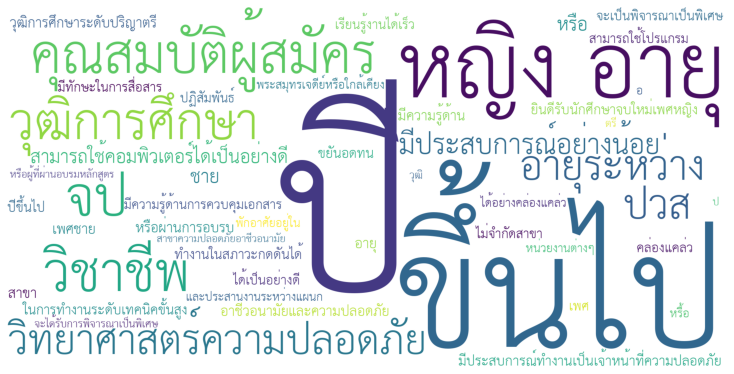

In [87]:
wordcloud = WordCloud(
#     font_path='c:/windows/fonts/browalia.ttc',
    font_path='c:/windows/fonts/thsarabunnew.ttf',
#     font_path='font_path/Kanit-Black.ttf',
#     font_path='font_path/Fahkwang-Medium.ttf',
    regexp='[ก-๙]+',

    width=2000, height=1000,

    prefer_horizontal=1,
    max_words=50, 

     colormap='viridis', # default matplotlib colormap
#     colormap='tab20c',
#     colormap='plasma',
    background_color = 'white').generate(tokens_listjoin)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
# plt.show()

In [88]:
cvec.vocabulary_

{'คุณสมบัติ': 162,
 'ผู้สมัคร': 205,
 '  ': 2,
 'เพศชาย': 266,
 ' ': 1,
 '-': 10,
 'หญิง': 243,
 'อายุ': 257,
 '25': 23,
 'ปี': 203,
 'ขึ้นไป': 149,
 'วุฒิการศึกษา': 234,
 'ระดับ': 223,
 'ปริ': 199,
 'ญา': 174,
 'ตรี': 177,
 'สาขา': 239,
 'อาชีว': 256,
 'อนามัย': 252,
 'และ': 275,
 'ความปลอดภัย': 155,
 '': 0,
 'วิทยาศาสตร์': 232,
 'หรือ': 246,
 'ผ่าน': 206,
 'กา': 139,
 'รอบ': 222,
 'รบ': 221,
 'จ': 164,
 'ป.': 196,
 'วิชาชีพ': 230,
 '   ': 3,
 'มีความรู้': 218,
 'ด้าน': 176,
 'IATF': 53,
 '16949': 16,
 'ISO': 54,
 '14001': 15,
 'OHSAS': 60,
 '18001': 17,
 'มีประสบการณ์': 219,
 'ทำงาน': 186,
 'เป็น': 263,
 'เจ้าหน้าที่': 260,
 'ใน': 281,
 'การทำงาน': 141,
 'เทคนิค': 262,
 'ขั้นสูง': 148,
 'ขยัน': 146,
 'อดทน': 251,
 'สภาวะ': 235,
 'กดดัน': 135,
 'ได้': 284,
 'ยินดี': 220,
 'รับ': 226,
 'นักศึกษา': 190,
 'จบ': 165,
 'ใหม่': 282,
 'เพศหญิง': 267,
 'ระหว่าง': 224,
 '20': 19,
 'ปวส.': 202,
 'อย่าง': 255,
 'น้อย': 191,
 '0': 13,
 '3': 25,
 'การควบคุม': 140,
 'เอกสาร': 271,
 '9001': 30,
 ':'

In [48]:
c_feat[:,:20].todense()

matrix([[  6,  15,   6,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
           0,   0,   1,   1,   1,   0,   0],
        [  4,  16,   4,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1,
           1,   0,   1,   1,   0,   0,   1],
        [  4,  25,   6,   1,   0,   0,   0,   1,   0,   1,   1,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  2,  14,   4,   2,   0,   0,   0,   0,   0,   0,   1,   0,   1,
           0,   0,   0,   0,   0,   0,   0],
        [  0,  11,   7,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
           0,   0,   0,   0,   0,   0,   1],
        [  0,  10,   1,   1,   2,   3,   0,   0,   1,   1,   2,   0,   0,
           0,   1,   0,   0,   0,   0,   0],
        [ 16, 100,  13,   0,   0,   0,   1,   1,   0,   1,   1,   7,   0,
           0,   0,   1,   0,   0,   1,   0],
        [  4,  28,   6,   0,   0,   0,   0,   0,   0,   0,   2,   1,   0,
           0,   1,   1,   0,   0,   1,   0],
        [  0,  11,   5,   1,   0,   0,   0,   0,

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

In [53]:
tvec.vocabulary_

{'คุณสมบัติ': 162,
 'ผู้สมัคร': 205,
 '  ': 2,
 'เพศชาย': 266,
 ' ': 1,
 '-': 10,
 'หญิง': 243,
 'อายุ': 257,
 '25': 23,
 'ปี': 203,
 'ขึ้นไป': 149,
 'วุฒิการศึกษา': 234,
 'ระดับ': 223,
 'ปริ': 199,
 'ญา': 174,
 'ตรี': 177,
 'สาขา': 239,
 'อาชีว': 256,
 'อนามัย': 252,
 'และ': 275,
 'ความปลอดภัย': 155,
 '': 0,
 'วิทยาศาสตร์': 232,
 'หรือ': 246,
 'ผ่าน': 206,
 'กา': 139,
 'รอบ': 222,
 'รบ': 221,
 'จ': 164,
 'ป.': 196,
 'วิชาชีพ': 230,
 '   ': 3,
 'มีความรู้': 218,
 'ด้าน': 176,
 'IATF': 53,
 '16949': 16,
 'ISO': 54,
 '14001': 15,
 'OHSAS': 60,
 '18001': 17,
 'มีประสบการณ์': 219,
 'ทำงาน': 186,
 'เป็น': 263,
 'เจ้าหน้าที่': 260,
 'ใน': 281,
 'การทำงาน': 141,
 'เทคนิค': 262,
 'ขั้นสูง': 148,
 'ขยัน': 146,
 'อดทน': 251,
 'สภาวะ': 235,
 'กดดัน': 135,
 'ได้': 284,
 'ยินดี': 220,
 'รับ': 226,
 'นักศึกษา': 190,
 'จบ': 165,
 'ใหม่': 282,
 'เพศหญิง': 267,
 'ระหว่าง': 224,
 '20': 19,
 'ปวส.': 202,
 'อย่าง': 255,
 'น้อย': 191,
 '0': 13,
 '3': 25,
 'การควบคุม': 140,
 'เอกสาร': 271,
 '9001': 30,
 ':'

In [50]:
t_feat[:,:5].todense()

matrix([[0.3395123 , 0.58456574, 0.23382629, 0.0625928 , 0.        ],
        [0.25563998, 0.70424957, 0.17606239, 0.        , 0.        ],
        [0.17829548, 0.7674643 , 0.18419143, 0.04930608, 0.        ],
        [0.12086306, 0.58267911, 0.16647974, 0.13369454, 0.        ],
        [0.        , 0.52936657, 0.33686963, 0.        , 0.        ],
        [0.        , 0.44280407, 0.04428041, 0.07112035, 0.23953469],
        [0.20674537, 0.88992548, 0.11569031, 0.        , 0.        ],
        [0.1736614 , 0.83721918, 0.17940411, 0.        , 0.        ],
        [0.        , 0.58562303, 0.26619229, 0.08550819, 0.        ],
        [0.        , 0.15685605, 0.31371209, 0.        , 0.        ]])

In [51]:
print(len(tvec.idf_),len(tvec.vocabulary_))

289 289


In [52]:
c_feat[:,:5].todense()

matrix([[  6,  15,   6,   1,   0],
        [  4,  16,   4,   0,   0],
        [  4,  25,   6,   1,   0],
        [  2,  14,   4,   2,   0],
        [  0,  11,   7,   0,   0],
        [  0,  10,   1,   1,   2],
        [ 16, 100,  13,   0,   0],
        [  4,  28,   6,   0,   0],
        [  0,  11,   5,   1,   0],
        [  0,   2,   4,   0,   0]], dtype=int64)

In [38]:
corpus = word_tokenize(corpus)
corpus

[]

In [34]:
import pythainlp
from pythainlp import word_tokenize
#pythainlp.corpus.stopwords.words("thai")
from pythainlp.corpus import stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

ImportError: cannot import name 'stopwords' from 'pythainlp.corpus' (C:\Users\SIRIPAT JANKHUANG\anaconda3\envs\pycaret\lib\site-packages\pythainlp\corpus\__init__.py)

In [33]:
import nltk
nltk.download('words')
th_stop = tuple(stopwords.words('thai'))
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

[nltk_data] Downloading package words to C:\Users\SIRIPAT
[nltk_data]     JANKHUANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


NameError: name 'stopwords' is not defined

In [35]:
from pythainlp.corpus import stopwords
stopwords = stopwords.words('thai')

ImportError: cannot import name 'stopwords' from 'pythainlp.corpus' (C:\Users\SIRIPAT JANKHUANG\anaconda3\envs\pycaret\lib\site-packages\pythainlp\corpus\__init__.py)

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

875 rows


C:\Users\SIRIPAT JANKHUANG\anaconda3\envs\pycaret\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
ณสมบ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                            #   , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [22]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [23]:
# Running Kmeans
k = 5
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

In [24]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

C:\Users\SIRIPAT JANKHUANG\anaconda3\envs\pycaret\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


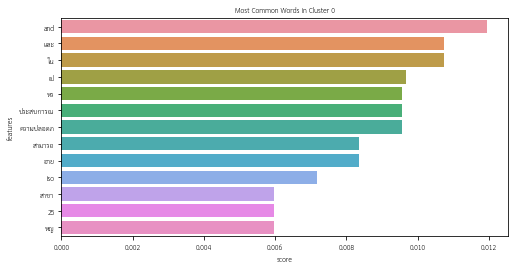

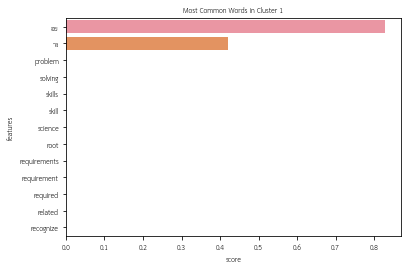

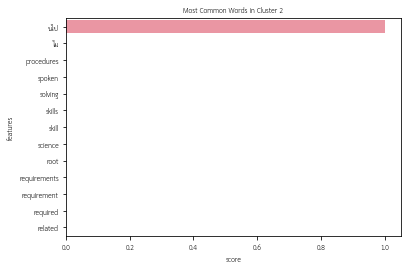

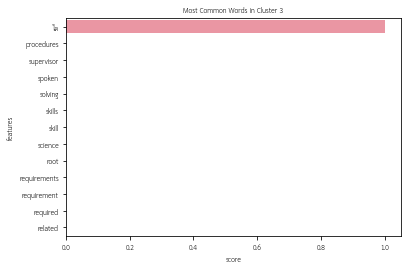

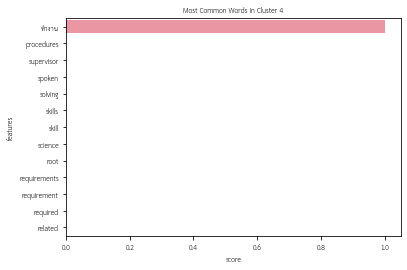

In [25]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [26]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

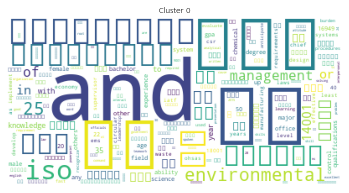

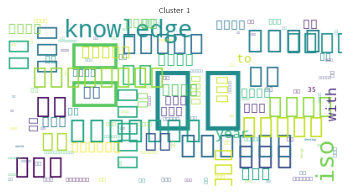

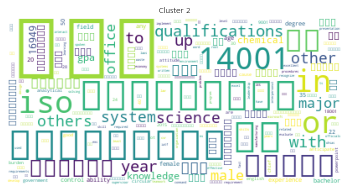

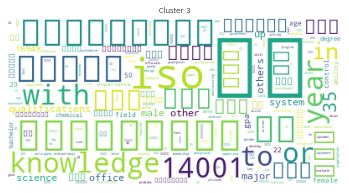

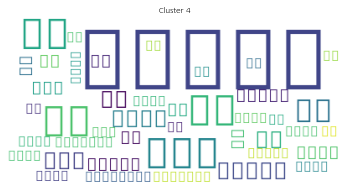

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [242]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')
plt = mpl.pyplot

In [43]:
#final.to_csv(r'qualifications.csv')

In [6]:
final=pd.DataFrame()
for j in data.id.to_list()[:10]:
    webpage=requests.get('https://www.jobthai.com/th/job/{}'.format(j)).text
    soup=BeautifulSoup(webpage,'lxml')
    company=soup.find_all('div',class_='jltwsh-0 gkuvRx')
    d1 = []
    d2 = []
    d3 = []
    d4 = []
    d5 = []
    d6 = []
    d7 = []
    
    for i in company:

        try:
            d1.append(i.find_all('li')[0].text.strip())
        except:
            d1.append(np.nan)
            
        try:
            d2.append(i.find_all('li')[1].text.strip())
        except:
            d2.append(np.nan)
            
        try:
            d3.append(i.find_all('li')[2].text.strip())
        except:
            d3.append(np.nan)
        
        try:
            d4.append(i.find_all('li')[3].text.strip())
        except:
            d4.append(np.nan)
        
        try:
            d5.append(i.find_all('li')[4].text.strip())
        except:
            d5.append(np.nan)
        
        try:
            d6.append(i.find_all('li')[5].text.strip())
        except:
            d6.append(np.nan)
            
        try:
            d7.append(i.find_all('li')[6].text.strip())
        except:
            d7.append(np.nan)
            
    df=pd.DataFrame({'qualifications1':d1,
                     'qualifications2':d2,
                     'qualifications3':d3,
                     'qualifications4':d4,
                     'qualifications5':d5,
                     'qualifications6':d6,
                     'qualifications7':d7

            })
  
    final=final.append(df,ignore_index=True)
    

In [7]:
final

,qualifications1,qualifications2,qualifications3,qualifications4,qualifications5,qualifications6,qualifications7
0,เพศชาย - หญิง อายุ 25 ปี ขึ้นไป,"วุฒิการศึกษาระดับปริญาตรี สาขา อาชีวอนามัยและความปลอดภัย, วิทยาศาสตร์ความปลอดภัย หรือผ่านการอบรบ จป.วิชาชีพ","มีความรู้ด้าน IATF16949, ISO14001, OHSAS18001",มีประสบการณ์ทำงานเป็นเจ้าหน้าที่ความปลอดภัย ในการทำงานระดับเทคนิคขั้นสูง,ขยันอดทน ทำงานในสภาวะกดดันได้,ยินดีรับนักศึกษาจบใหม่,NaN
1,เพศหญิง อายุระหว่าง 20 ปีขึ้นไป,วุฒิการศึกษา ปวส. ขึ้นไป,มีประสบการณ์อย่างน้อย 0 - 3 ปี,"มีความรู้ด้านการควบคุมเอกสาร ISO 9001:2015, ISO/TS 16949, ISO 14001 จะเป็นพิจารณาเป็นพิเศษ",สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี,NaN,NaN
2,เพศ ชาย หรือ หญิง,อายุ 22-30 ปี,วุฒิการศึกษา ปวส.ขึ้นไป ไม่จำกัดสาขา,"สามารถใช้โปรแกรม MS Office ( Word , Excel , PowerPoint ) ได้เป็นอย่างดี",เรียนรู้งานได้เร็ว คล่องแคล่ว,มีทักษะในการสื่อสาร ปฏิสัมพันธ์ และประสานงานระหว่างแผนก หร้ือ หน่วยงานต่างๆ ได้อย่างคล่องแคล่ว,พักอาศัยอยู่ใน อ.พระสมุทรเจดีย์หรือใกล้เคียง จะได้รับการพิจารณาเป็นพิเศษ
3,ชาย / หญิง อายุ 25 - 40 ปี,"วุฒิ ป.ตรี สาขาความปลอดภัยอาชีวอนามัย, วิทยาศาสตร์ความปลอดภัย หรือผู้ที่ผ่านอบรมหลักสูตร จป.วิชาชีพ",มีความอดทนและมีความเป็นผู้นำสูง,มีความขยันและทุ่มเทกับงาน,มีมนุษยสัมพันธ์ดี มีทักษะในการประสานงาน ทั้งภายในองค์กร และภายนอกองค์กร,NaN,NaN
4,เพศชาย หรือ หญิง,อายุ 20 - 35 ปี,วุฒิการศึกษา ปวช ขึ้นไป,มีประสบการณ์ในสายงานหรือเกี่ยวข้อง,มีความอดทนที่จะทำงานภายใต้แรงกดดันได้ดี,ถ้ามีประสบการณ์ในสายงาน จะพิจารณาเป็นพิเศษ,สามารถอยู่ทำ OT ได้ตามความเหมาะสมของงาน
5,เพศชาย อายุระหว่าง 22-25 ปี,วุฒิการศึกษาระดับปริญญาตรี สาขาด้านอาชีวอนามัยและความปลอดภัย (จป. วิชาชีพ),มีประสบการณ์อย่างน้อย 1 ปี ขึ้นไป,สามารถจัดระบบความปลอดภัยในการทำงานได้,มีความกระตือรือร้น และมีมนุษย์สัมพันธ์ดี,สามารถใช้คอมพิวเตอร์ได้เป็นอย่างดี,สามารถเป็นวิทยากรในการอบรมลูกจ้างได้
6,Male or Female Age 25-35 Year.,Bachelor’s Degree Major : Environmental Science or any field related with environmental management system.,GPA 2.50 UP,As least 3 years of experience in supervisor or chief level of environmental management system in manufacturing.,"Knowledge of EMS control, waste management, chemical management, laws and others requirements.","Ability to design, develop and implement effective management systems (ISO14001,Circular Economy and CSR)","Knowledge of procedures used to anticipate, recognize evaluate and control environmental burden"
7,Male or Female Age 24-28 Year.,"Bachelor Degree Major : Environment , Chemical Science program in any field",GPA 2.50 Up,"Have knowledge ISO14001, environmental law and other requirement and other",Experience 1-5 Year,NaN,NaN
8,อายุ 25 ปี - 35 ปี ชายหรือหญิง,มีความรับผิดชอบต่อหน้าที่ที่ได้รับมอบหมาย,กล้าหาญ อดทน,มีความยุติธรรม,รัก คน และชีวิตของคน,ให้ความสำคัญกับความปลอดภัยของโรงงาน และ พนักงาน,NaN
9,ปวส.ขึ้นไป สาขาช่างต่างๆ,มีประสบการณ์ซ่อมบำรุงทั่วไป,มีประสบการณ์ควบคุมบ่อบำบัดน้ำดี-น้ำเสียจะพิจารณาเป็นพิเศษ,มีประสบการณ์ทำงานโรงงานอุตสาหกรรม,ควรใช้Microsoft Officeได้,NaN,NaN


In [155]:
data.id.to_list()[6]

1290201